### Importing Libraries and Dataset
<hr/>

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/train.csv', sep=',')

In [7]:
df.shape

(20758, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### Analysis
<hr/>

#### What is the distribution of the output variable between the categories?

In [10]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [25]:
df['NObeyesdad'].str.contains('Obesity').sum()/df.shape[0], df['NObeyesdad'].str.contains('Overweight').sum()/df.shape[0]

(0.49156951536756915, 0.23841410540514502)

- The dataset seems to be distributed among the classes
- 50% of the dataset is obese and 23% is overweight

#### What is the distribution of the input variables?

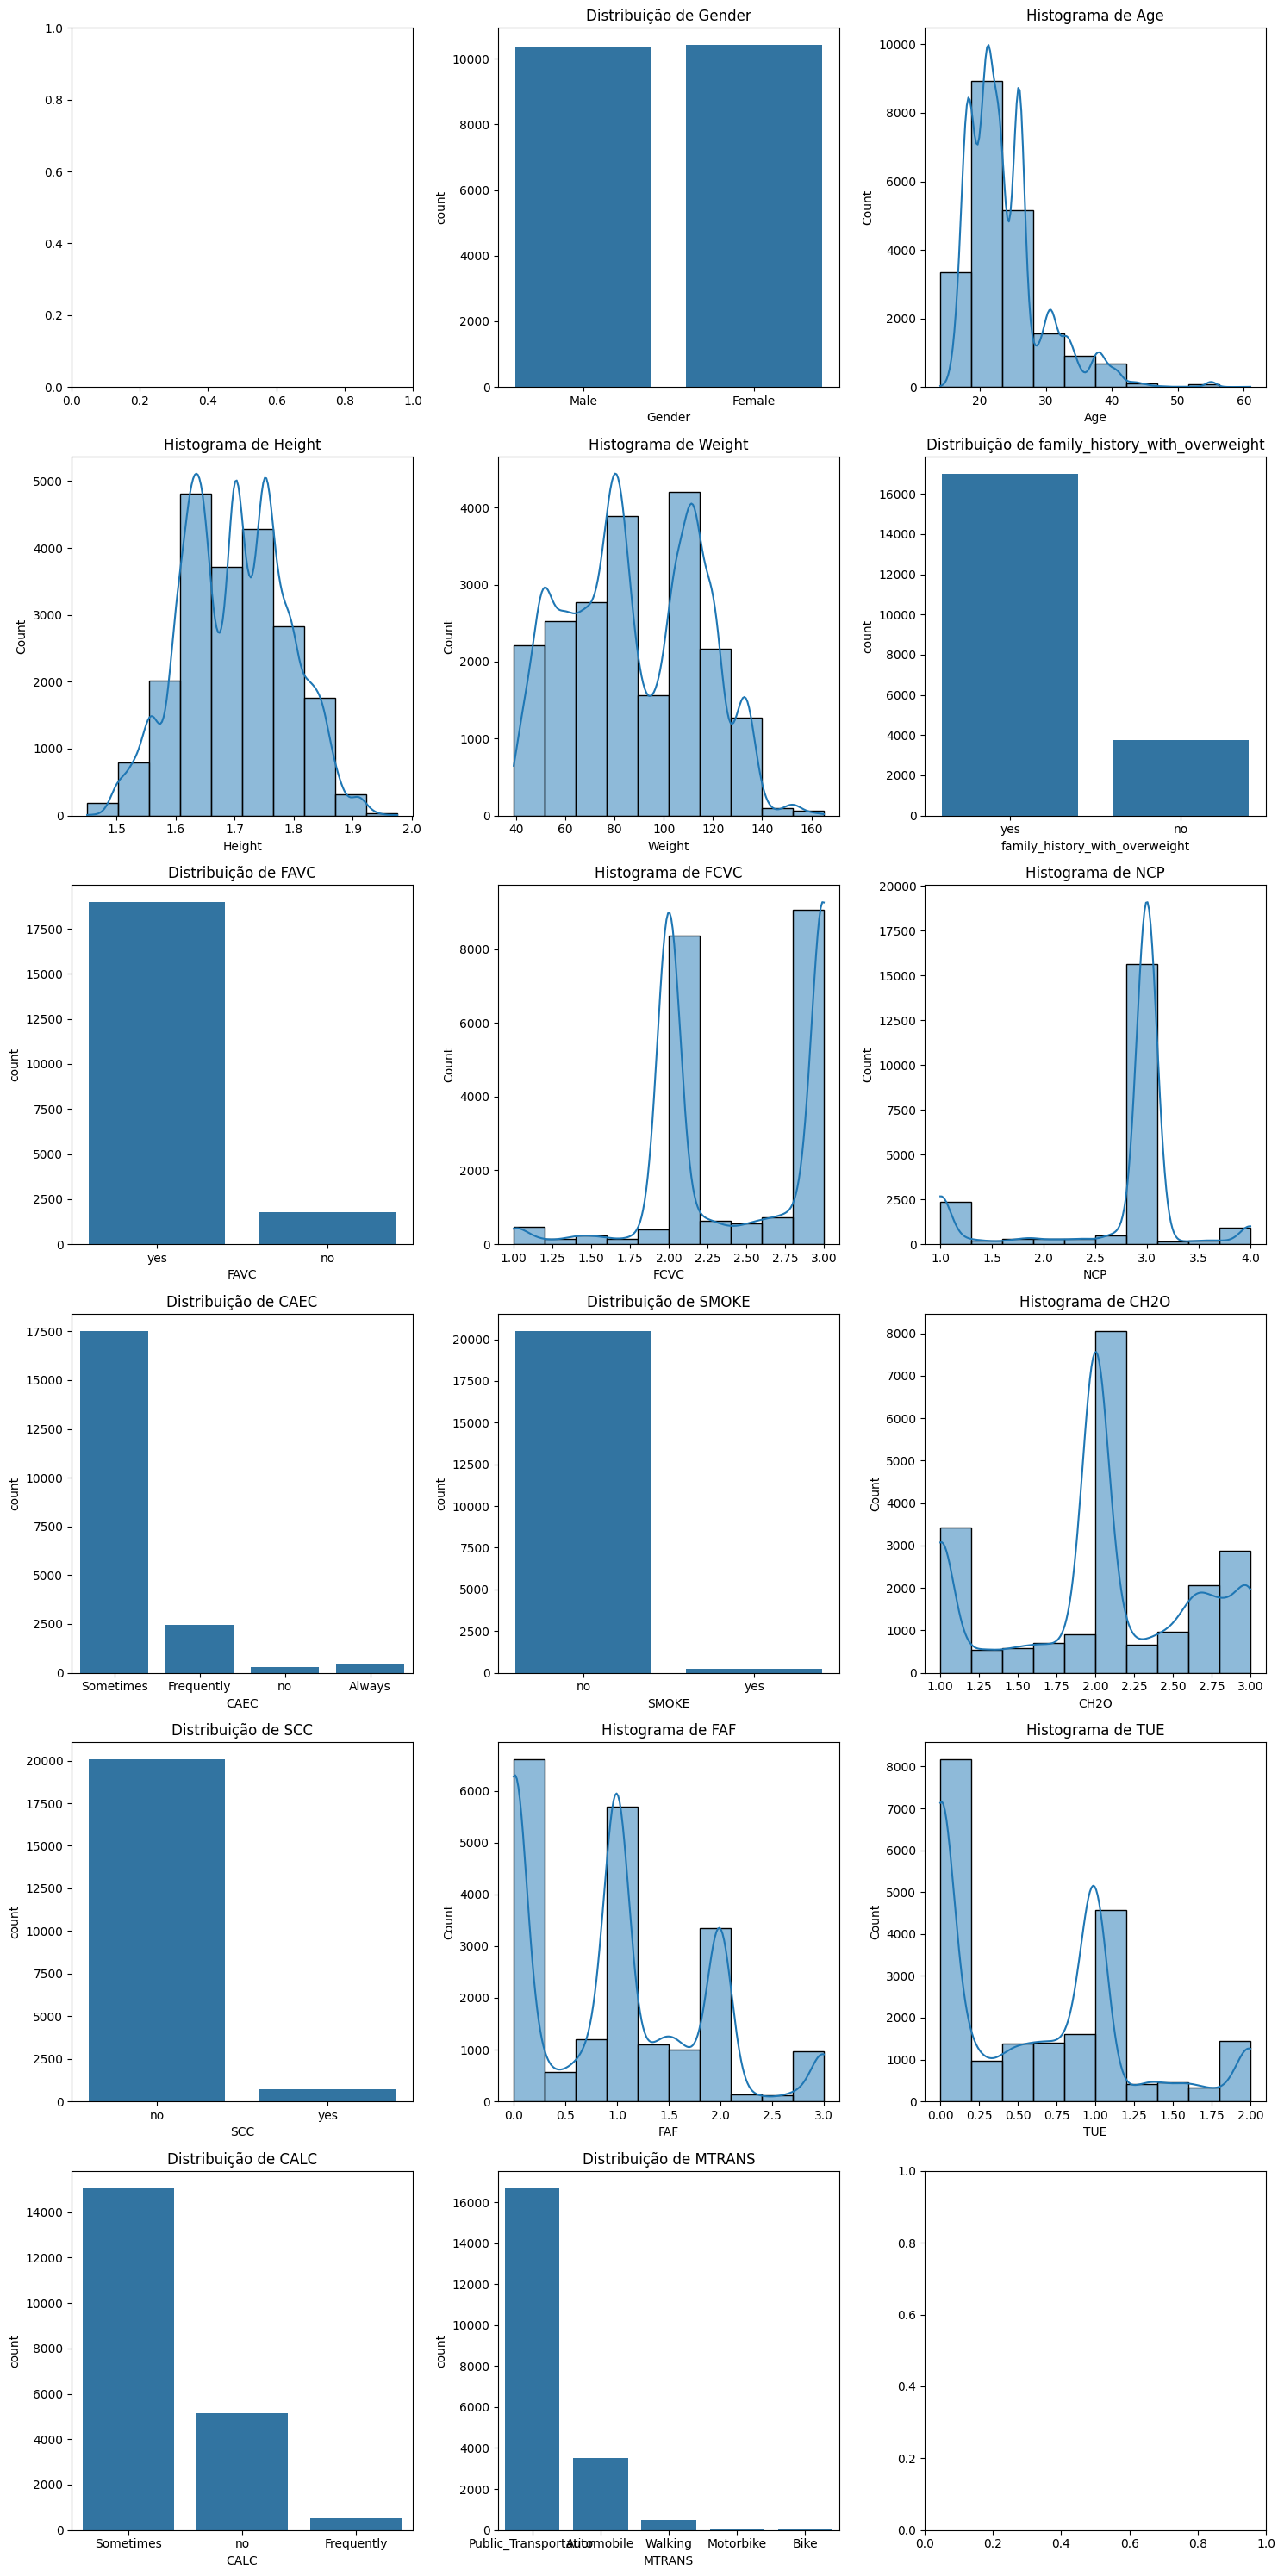

In [28]:
def plot_grid_distributions(df):
    n_vars = df.shape[1] - 2  # Número de variáveis
    n_cols = 3  # Número de colunas no grid
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Transforma a matriz de eixos em um array 1D para fácil iteração

    for i, column in enumerate(df.columns):
        if column not in ('id', 'NObeyesdad'):
            ax = axes[i]
            if df[column].dtype == 'object':  # Variável categórica
                sns.countplot(data=df, x=column, ax=ax)
                ax.set_title(f'Distribuição de {column}')
            else:  # Variável numérica
                sns.histplot(data=df, x=column, kde=True, bins=10, ax=ax)
                ax.set_title(f'Histograma de {column}')
    
    # Esconde os eixos extras se o número de variáveis não preencher o grid completo
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_grid_distributions(df)

Conclusions:

- The dataset seems to be distributed in terms of the number of men and women
- Age seems to be skewed towards younger people
- Height seems to have a normal distribution
- Most of the dataset has a family history of overweight
- Most of the dataset has frequent consumption of high caloric food (FAVC)
- Most of the dataset doesn't smoke (SMOKE)
- Water consumption is concentrated at 2 liters, but there is a considerable volume consuming 1 liter and 3 liters (CH2O)
- Most of the dataset doesn't monitor the calories they consume (SCC)
- Most of the dataset does physical activity once a week or not at all (FAF)
- Most of the dataset spends 1 hour on technology or 0 hours (TUE)
- Most of the dataset consumes alcohol "sometimes" (CALC)
- Most of the dataset uses public transport (MTRANS)


Insights:
- The distribution of time spent on technology is strange, given that we're looking at a younger population
- As the dataset is concentrated in the overweight and obese categories, the low frequency of physical activity and high consumption of caloric foods makes sense 

#### What is the relationship between the output variable and the input variables?

##### Variáveis Categóricas

In [38]:
def plot_categorical_with_hue(df, hue):
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if col != hue]  # Remove o hue das variáveis categóricas
    
    n_vars = len(categorical_columns)  # Número de variáveis categóricas sem contar o hue
    n_cols = 3  # Número de colunas no grid
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Transforma a matriz de eixos em um array 1D para fácil iteração

    for i, column in enumerate(categorical_columns):
        ax = axes[i]
        # Calcular a frequência relativa
        freq = (df.groupby([column])[hue]
                .value_counts(normalize=True)
                .rename('percentage')
                .mul(100)
                .reset_index()
                .sort_values(hue))
        sns.barplot(x=column, y='percentage', hue=hue, data=freq, ax=ax)
        ax.set_title(f'Frequência Relativa de {column}')
        ax.set_ylabel('Percentagem (%)')
    
    # Esconde os eixos extras se o número de variáveis não preencher o grid completo
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


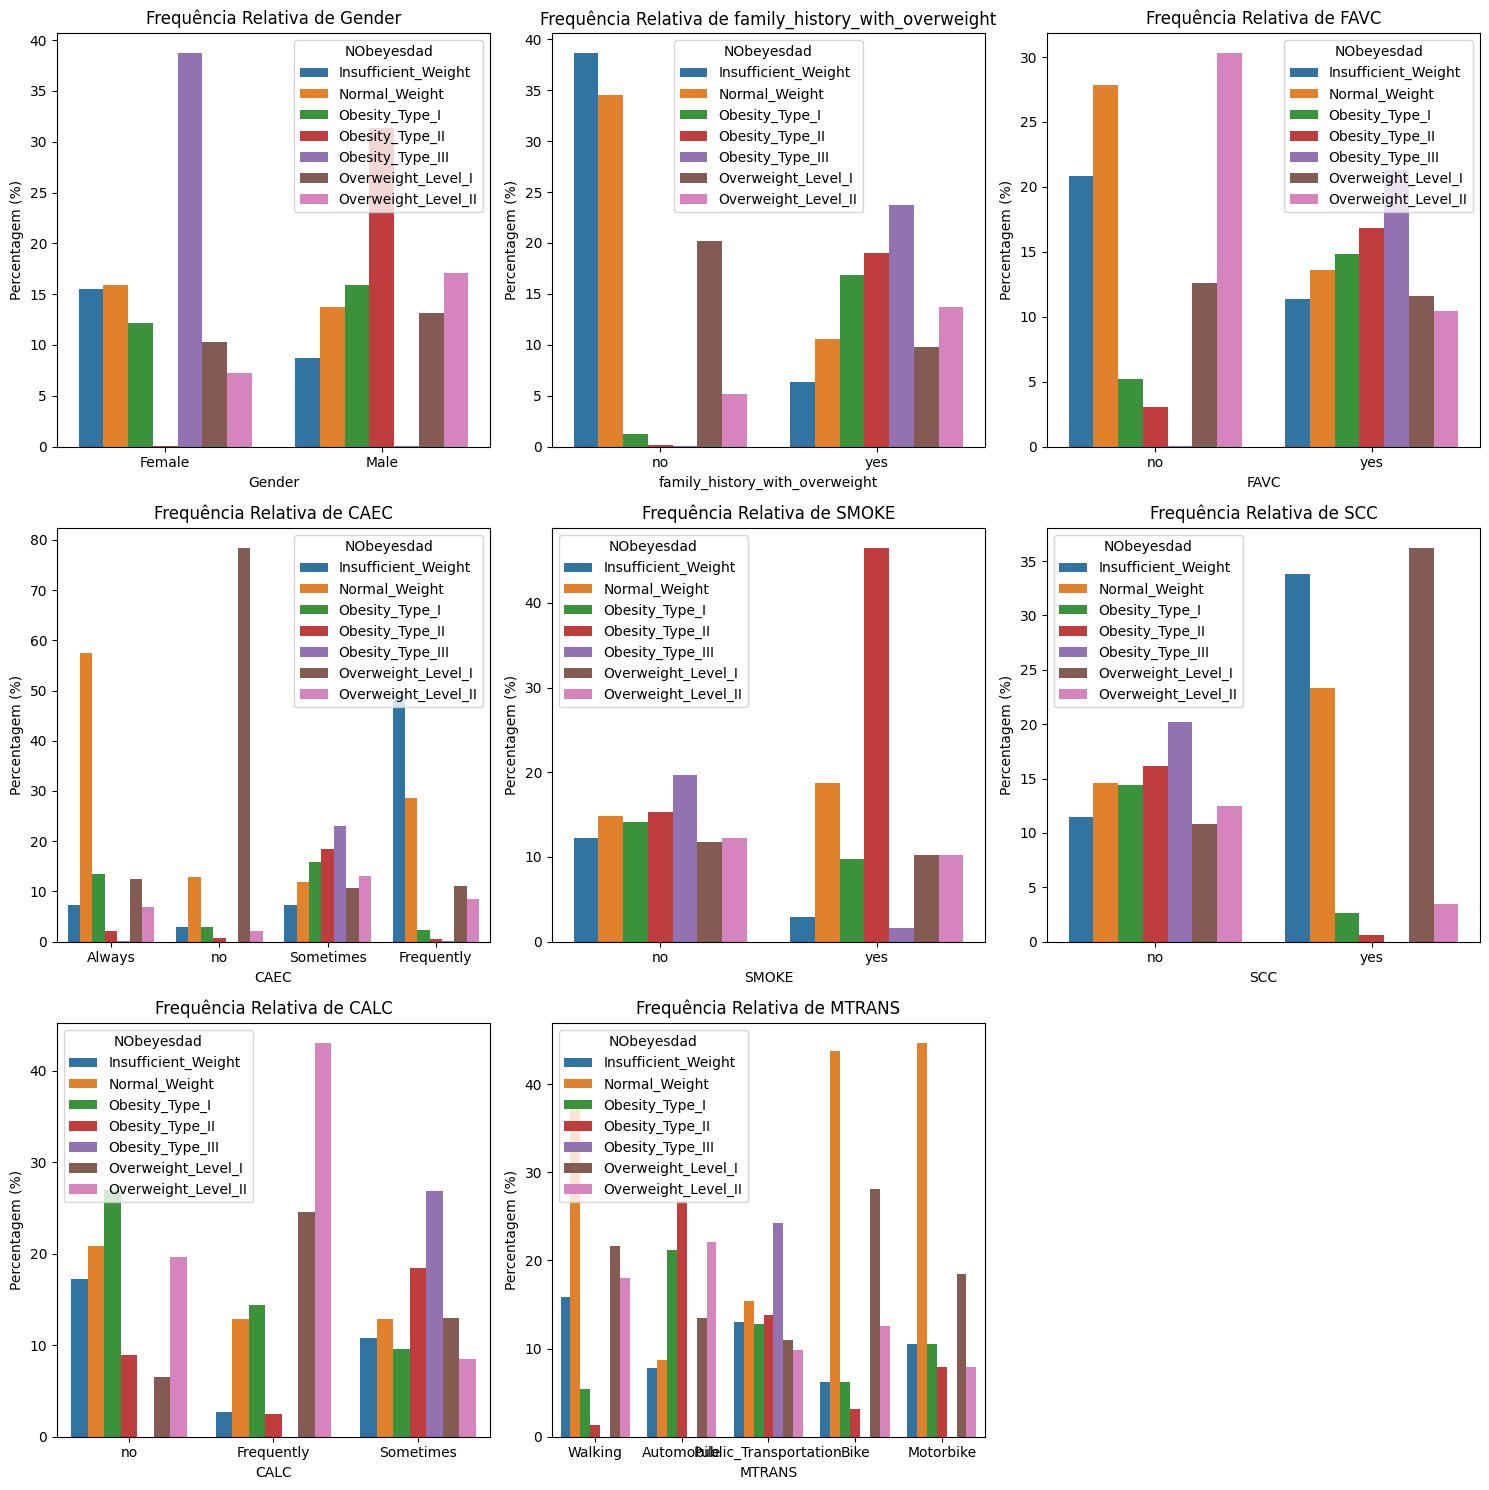

In [39]:
plot_categorical_with_hue(df, 'NObeyesdad')

#### What is the relationshio between input variables